In [1]:
from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
pwd

'/content/EVA8/Session_5_Assignment'

In [ ]:
%cd ..


/content/EVA8/Session_5_Assignment


In [3]:
!git clone https://github.com/shreyash-99/EVA8.git

Cloning into 'EVA8'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 207 (delta 14), reused 30 (delta 8), pack-reused 166
Receiving objects: 100% (207/207), 3.42 MiB | 4.90 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [4]:
%cd EVA8/Session_5_Assignment

/content/EVA8/Session_5_Assignment


In [6]:
from model import get_model

In [7]:
train_transforms = transforms.Compose([transforms.RandomRotation((-7.0,7.0), fill = (1,)) ,  
                                      transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081, ))])
train = datasets.MNIST('./data', train = True, download = True, transform = train_transforms)
test = datasets.MNIST('./data', train = False, download = True, transform = test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
SEED = 1

cuda = torch.cuda.is_available()
print("CUDA available" , cuda)

#for Reproducibilty
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

# setting the dataloader arguments for both test and train data
dataloader_args = dict(shuffle = True, batch_size = 128, num_workers = 4, pin_memory = True) if cuda else dict(shuffle = True, batch_size = 64)

train_loader = torch.utils.data.DataLoader(train , **dataloader_args)
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA available True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [9]:
!ls

Assignment_5_Notebook.ipynb  data  Images  model.py  __pycache__  README.md


In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_GN = get_model("GN").to(device)
model_LN = get_model("LN").to(device)
model_BN = get_model("BN").to(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [11]:
summary(model_GN, input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]           1,152
       BatchNorm2d-6           [-1, 16, 26, 26]              32
              ReLU-7           [-1, 16, 26, 26]               0
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9            [-1, 8, 26, 26]             128
        MaxPool2d-10            [-1, 8, 13, 13]               0
           Conv2d-11           [-1, 16, 11, 11]           1,152
      BatchNorm2d-12           [-1, 16, 11, 11]              32
             ReLU-13           [-1, 16, 11, 11]               0
          Dropout-14           [-1, 16,

In [12]:
summary(model_LN, input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         LayerNorm-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]           1,152
              ReLU-6           [-1, 16, 26, 26]               0
         LayerNorm-7           [-1, 16, 26, 26]               0
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9            [-1, 8, 26, 26]             128
        MaxPool2d-10            [-1, 8, 13, 13]               0
           Conv2d-11           [-1, 16, 11, 11]           1,152
             ReLU-12           [-1, 16, 11, 11]               0
        LayerNorm-13           [-1, 16, 11, 11]               0
          Dropout-14           [-1, 16,

In [13]:
summary(model_BN, input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]           1,152
       BatchNorm2d-6           [-1, 16, 26, 26]              32
              ReLU-7           [-1, 16, 26, 26]               0
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9            [-1, 8, 26, 26]             128
        MaxPool2d-10            [-1, 8, 13, 13]               0
           Conv2d-11           [-1, 16, 11, 11]           1,152
      BatchNorm2d-12           [-1, 16, 11, 11]              32
             ReLU-13           [-1, 16, 11, 11]               0
          Dropout-14           [-1, 16,

In [18]:
from tqdm import tqdm


def train(model, device, train_loader, optimiser, epoch, L1_regularisation = "false"):

  train_losses = []
  train_acc = []
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    #get samples
    data, target = data.to(device), target.to(device)

    #init
    optimiser.zero_grad()

    #prediction
    y_pred = model(data)

    #calculate loss
    loss = F.nll_loss(y_pred, target)
    if L1_regularisation.lower() == "true":
      l1 = 0
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      lambda_l1 = loss / (l1 * 10)         # keeping lambda for 10 % loss in weights
      loss = loss + lambda_l1 * l1

    train_losses.append(loss)

    #Backpropagation
    loss.backward()
    optimiser.step()

    # update pbar - tqdm

    pred = y_pred.argmax(dim = 1, keepdim = True) # gets the index of the max log-probabilirty
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)
  return train_losses[-1], train_acc[-1]

def test(model, device, test_loader):
  test_losses = []
  test_acc = []
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)

  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
  test_acc.append(100. * correct / len(test_loader.dataset))
  return test_losses, test_acc


def plot_missclassification(model,test_loader):
  model.eval()
  misclassified_images = []    
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      _, pred = torch.max(output, 1)
      for i in range(len(pred)):
        if pred[i] != target[i]:
          misclassified_images.append({'image': data[i], 'predicted_class': pred[i], 'correct_class': target[i]})
  return misclassified_images

In [29]:
from torch.optim.lr_scheduler import StepLR

model =  model_GN.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
GN_test_losses = []
GN_test_accuracies = []
GN_train_losses = []
GN_train_accuracies = []

EPOCHS = 20
for epoch in range(EPOCHS):
  print("EPOCH:", epoch, "Learning Rate: ", scheduler.get_last_lr())
  GN_train_loss, GN_train_acc = train(model, device, train_loader, optimizer, epoch)
  # print(GN_train_loss,type(GN_train_loss), GN_train_acc, type(GN_train_acc))
  GN_train_losses.append(GN_train_loss.item())
  GN_train_accuracies.append(GN_train_acc)
  scheduler.step()
  GN_test_loss, GN_test_acc = test(model, device, test_loader)
  GN_test_losses.append(GN_test_loss[0])
  GN_test_accuracies.append(GN_test_acc[0])

EPOCH: 0 Learning Rate:  [0.03]


Loss=0.028742479160428047 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:26<00:00, 17.40it/s]



Test set: Average loss: 0.0246, Accuracy: 9927/10000 (99.27%)

EPOCH: 1 Learning Rate:  [0.03]


Loss=0.008819627575576305 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:28<00:00, 16.37it/s]



Test set: Average loss: 0.0192, Accuracy: 9933/10000 (99.33%)

EPOCH: 2 Learning Rate:  [0.03]


Loss=0.018021181225776672 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:21<00:00, 22.08it/s]



Test set: Average loss: 0.0239, Accuracy: 9926/10000 (99.26%)

EPOCH: 3 Learning Rate:  [0.03]


Loss=0.004742544610053301 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:26<00:00, 17.53it/s]



Test set: Average loss: 0.0260, Accuracy: 9915/10000 (99.15%)

EPOCH: 4 Learning Rate:  [0.03]


Loss=0.03467879444360733 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:25<00:00, 18.58it/s]



Test set: Average loss: 0.0224, Accuracy: 9925/10000 (99.25%)

EPOCH: 5 Learning Rate:  [0.03]


Loss=0.002364806132391095 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:27<00:00, 17.08it/s]



Test set: Average loss: 0.0241, Accuracy: 9926/10000 (99.26%)

EPOCH: 6 Learning Rate:  [0.003]


Loss=0.04194911941885948 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:27<00:00, 17.35it/s]



Test set: Average loss: 0.0172, Accuracy: 9943/10000 (99.43%)

EPOCH: 7 Learning Rate:  [0.003]


Loss=0.07084942609071732 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:26<00:00, 17.90it/s]



Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)

EPOCH: 8 Learning Rate:  [0.003]


Loss=0.10401999205350876 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:22<00:00, 21.28it/s]



Test set: Average loss: 0.0166, Accuracy: 9946/10000 (99.46%)

EPOCH: 9 Learning Rate:  [0.003]


Loss=0.06941140443086624 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:22<00:00, 20.99it/s]



Test set: Average loss: 0.0169, Accuracy: 9948/10000 (99.48%)

EPOCH: 10 Learning Rate:  [0.003]


Loss=0.012860951013863087 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]



Test set: Average loss: 0.0180, Accuracy: 9940/10000 (99.40%)

EPOCH: 11 Learning Rate:  [0.003]


Loss=0.07472381740808487 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:21<00:00, 21.88it/s]



Test set: Average loss: 0.0173, Accuracy: 9938/10000 (99.38%)

EPOCH: 12 Learning Rate:  [0.00030000000000000003]


Loss=0.06576003134250641 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:20<00:00, 23.04it/s]



Test set: Average loss: 0.0163, Accuracy: 9943/10000 (99.43%)

EPOCH: 13 Learning Rate:  [0.00030000000000000003]


Loss=0.053291600197553635 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:22<00:00, 20.90it/s]



Test set: Average loss: 0.0166, Accuracy: 9946/10000 (99.46%)

EPOCH: 14 Learning Rate:  [0.00030000000000000003]


Loss=0.033656682819128036 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:21<00:00, 21.58it/s]



Test set: Average loss: 0.0170, Accuracy: 9943/10000 (99.43%)

EPOCH: 15 Learning Rate:  [0.00030000000000000003]


Loss=0.009365479461848736 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:22<00:00, 20.40it/s]



Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH: 16 Learning Rate:  [0.00030000000000000003]


Loss=0.002423405647277832 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]



Test set: Average loss: 0.0167, Accuracy: 9942/10000 (99.42%)

EPOCH: 17 Learning Rate:  [0.00030000000000000003]


Loss=0.007259948179125786 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:22<00:00, 21.14it/s]



Test set: Average loss: 0.0167, Accuracy: 9948/10000 (99.48%)

EPOCH: 18 Learning Rate:  [3.0000000000000004e-05]


Loss=0.0026724415365606546 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:20<00:00, 23.14it/s]



Test set: Average loss: 0.0170, Accuracy: 9947/10000 (99.47%)

EPOCH: 19 Learning Rate:  [3.0000000000000004e-05]


Loss=0.009476978331804276 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]



Test set: Average loss: 0.0164, Accuracy: 9948/10000 (99.48%)



In [30]:
GN_test_accuracies

[99.27,
 99.33,
 99.26,
 99.15,
 99.25,
 99.26,
 99.43,
 99.47,
 99.46,
 99.48,
 99.4,
 99.38,
 99.43,
 99.46,
 99.43,
 99.46,
 99.42,
 99.48,
 99.47,
 99.48]

In [31]:
GN_train_losses

[0.028742479160428047,
 0.008819627575576305,
 0.018021181225776672,
 0.004742544610053301,
 0.03467879444360733,
 0.002364806132391095,
 0.04194911941885948,
 0.07084942609071732,
 0.10401999205350876,
 0.06941140443086624,
 0.012860951013863087,
 0.07472381740808487,
 0.06576003134250641,
 0.053291600197553635,
 0.033656682819128036,
 0.009365479461848736,
 0.002423405647277832,
 0.007259948179125786,
 0.0026724415365606546,
 0.009476978331804276]

<class 'list'>


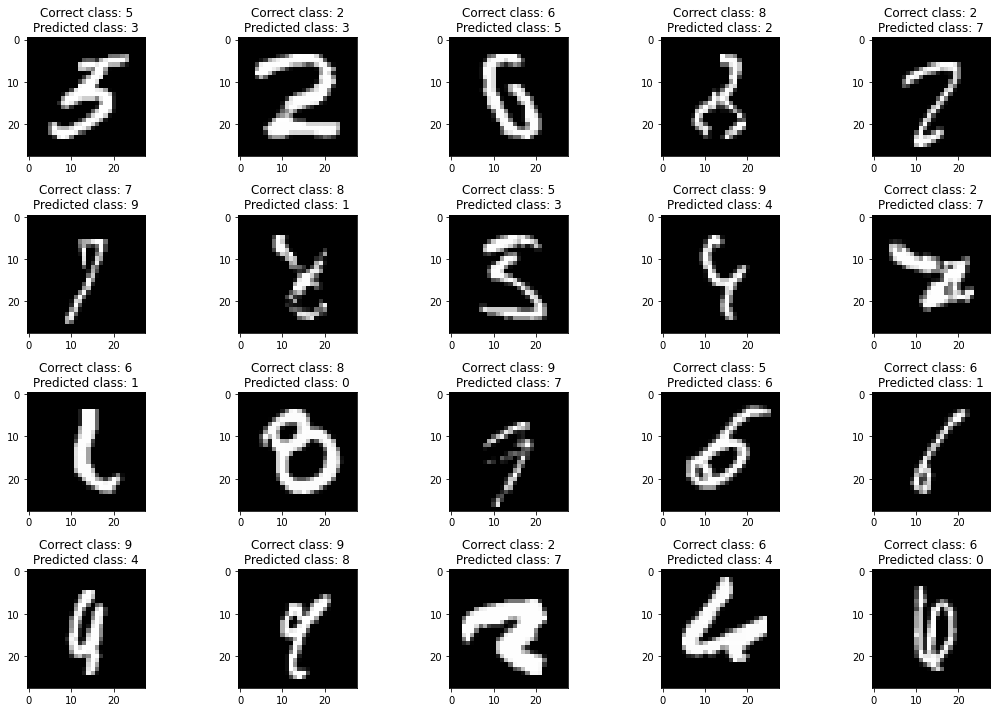

In [33]:
import matplotlib.pyplot as plt
misclassified_images_GN = plot_missclassification(model, test_loader)
print(type(misclassified_images_GN))
fig = plt.figure(figsize=(15, 10))
for i in range(20):
  sub = fig.add_subplot(4, 5, i+1)
  misclassified_image = misclassified_images_GN[i]
  plt.imshow(misclassified_image['image'].cpu().numpy().squeeze(), cmap='gray', interpolation='none')
  sub.set_title("Correct class: {}\nPredicted class: {}".format(misclassified_image['correct_class'], misclassified_image['predicted_class']))
plt.tight_layout()
plt.show()

In [35]:
from torch.optim.lr_scheduler import StepLR

model =  model_LN.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
LN_test_losses = []
LN_test_accuracies = []
LN_train_losses = []
LN_train_accuracies = []

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch, "Learning Rate: ", scheduler.get_last_lr())
    LN_train_loss, LN_train_acc = train(model, device, train_loader, optimizer, epoch)
    LN_train_losses.append(LN_train_loss.item())
    LN_train_accuracies.append(LN_train_acc)
    scheduler.step()
    LN_test_loss, LN_test_acc = test(model, device, test_loader)
    LN_test_losses.append(LN_test_loss[0])
    LN_test_accuracies.append(LN_test_acc[0])

EPOCH: 0 Learning Rate:  [0.03]


Loss=0.04601886495947838 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]



Test set: Average loss: 0.0384, Accuracy: 9881/10000 (98.81%)

EPOCH: 1 Learning Rate:  [0.03]


Loss=0.03451695665717125 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 23.66it/s]



Test set: Average loss: 0.0343, Accuracy: 9897/10000 (98.97%)

EPOCH: 2 Learning Rate:  [0.03]


Loss=0.014001944102346897 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]



Test set: Average loss: 0.0309, Accuracy: 9903/10000 (99.03%)

EPOCH: 3 Learning Rate:  [0.03]


Loss=0.0768011286854744 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:21<00:00, 22.26it/s]



Test set: Average loss: 0.0291, Accuracy: 9902/10000 (99.02%)

EPOCH: 4 Learning Rate:  [0.03]


Loss=0.03800729662179947 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:22<00:00, 20.45it/s]



Test set: Average loss: 0.0258, Accuracy: 9923/10000 (99.23%)

EPOCH: 5 Learning Rate:  [0.03]


Loss=0.007138245273381472 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:20<00:00, 22.92it/s]



Test set: Average loss: 0.0251, Accuracy: 9923/10000 (99.23%)

EPOCH: 6 Learning Rate:  [0.003]


Loss=0.012385188601911068 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:20<00:00, 22.71it/s]



Test set: Average loss: 0.0199, Accuracy: 9942/10000 (99.42%)

EPOCH: 7 Learning Rate:  [0.003]


Loss=0.03667737916111946 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:19<00:00, 23.55it/s]



Test set: Average loss: 0.0193, Accuracy: 9944/10000 (99.44%)

EPOCH: 8 Learning Rate:  [0.003]


Loss=0.014384926296770573 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:21<00:00, 22.15it/s]



Test set: Average loss: 0.0184, Accuracy: 9944/10000 (99.44%)

EPOCH: 9 Learning Rate:  [0.003]


Loss=0.0282785352319479 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]



Test set: Average loss: 0.0190, Accuracy: 9945/10000 (99.45%)

EPOCH: 10 Learning Rate:  [0.003]


Loss=0.06491296738386154 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]



Test set: Average loss: 0.0190, Accuracy: 9940/10000 (99.40%)

EPOCH: 11 Learning Rate:  [0.003]


Loss=0.017704317346215248 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]



Test set: Average loss: 0.0179, Accuracy: 9946/10000 (99.46%)

EPOCH: 12 Learning Rate:  [0.00030000000000000003]


Loss=0.005101031623780727 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:20<00:00, 23.11it/s]



Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)

EPOCH: 13 Learning Rate:  [0.00030000000000000003]


Loss=0.030648378655314445 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:23<00:00, 19.81it/s]



Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)

EPOCH: 14 Learning Rate:  [0.00030000000000000003]


Loss=0.02571670152246952 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:20<00:00, 22.56it/s]



Test set: Average loss: 0.0181, Accuracy: 9944/10000 (99.44%)

EPOCH: 15 Learning Rate:  [0.00030000000000000003]


Loss=0.030517587438225746 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]



Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

EPOCH: 16 Learning Rate:  [0.00030000000000000003]


Loss=0.020344840362668037 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]



Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

EPOCH: 17 Learning Rate:  [0.00030000000000000003]


Loss=0.008490527980029583 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]



Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

EPOCH: 18 Learning Rate:  [3.0000000000000004e-05]


Loss=0.06079674884676933 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 22.45it/s]



Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

EPOCH: 19 Learning Rate:  [3.0000000000000004e-05]


Loss=0.01359723974019289 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:20<00:00, 22.53it/s]



Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)



<class 'list'>


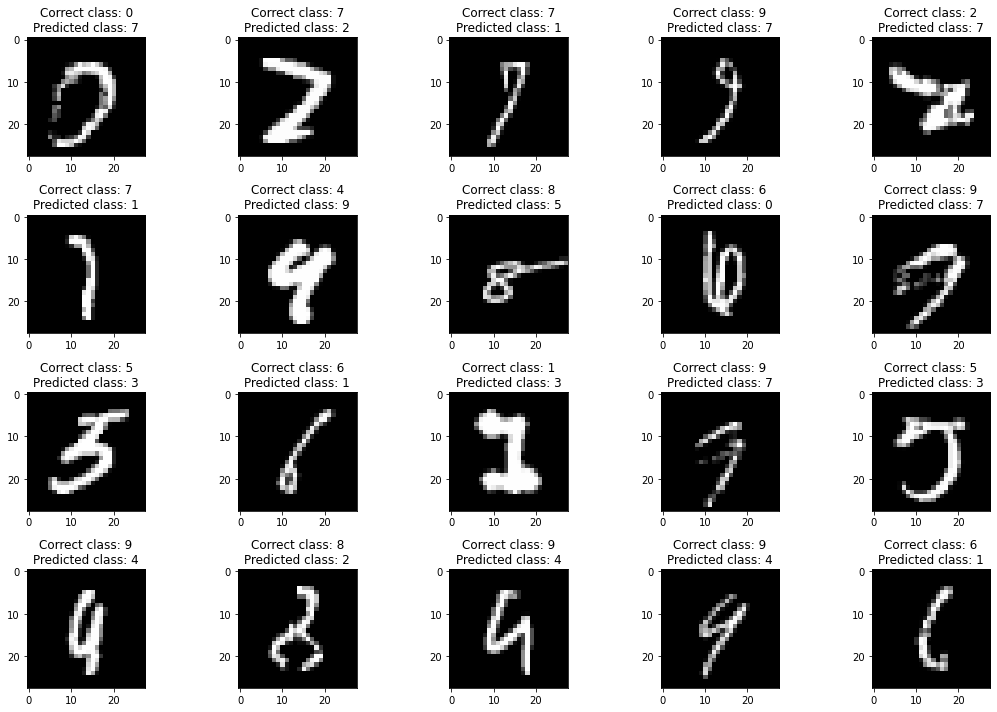

In [36]:
import matplotlib.pyplot as plt
misclassified_images_LN = plot_missclassification(model, test_loader)
print(type(misclassified_images_LN))
fig = plt.figure(figsize=(15, 10))
for i in range(20):
  sub = fig.add_subplot(4, 5, i+1)
  misclassified_image = misclassified_images_LN[i]
  plt.imshow(misclassified_image['image'].cpu().numpy().squeeze(), cmap='gray', interpolation='none')
  sub.set_title("Correct class: {}\nPredicted class: {}".format(misclassified_image['correct_class'], misclassified_image['predicted_class']))
plt.tight_layout()
plt.show()

In [37]:
from torch.optim.lr_scheduler import StepLR

model =  model_BN.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
BN_test_losses = []
BN_test_accuracies = []
BN_train_losses = []
BN_train_accuracies = []

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch, "Learning Rate: ", scheduler.get_last_lr())
    BN_train_loss, BN_train_acc = train(model, device, train_loader, optimizer, epoch, "true")
    BN_train_losses.append(BN_train_loss.item())
    BN_train_accuracies.append(BN_train_acc)
    scheduler.step()
    BN_test_loss, BN_test_acc = test(model, device, test_loader)
    BN_test_losses.append(BN_test_loss[0])
    BN_test_accuracies.append(BN_test_acc[0])

EPOCH: 0 Learning Rate:  [0.03]


Loss=0.11126197874546051 Batch_id=468 Accuracy=88.49: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]



Test set: Average loss: 0.0920, Accuracy: 9724/10000 (97.24%)

EPOCH: 1 Learning Rate:  [0.03]


Loss=0.04715671017765999 Batch_id=468 Accuracy=97.62: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]



Test set: Average loss: 0.0484, Accuracy: 9855/10000 (98.55%)

EPOCH: 2 Learning Rate:  [0.03]


Loss=0.12153319269418716 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:23<00:00, 19.89it/s]



Test set: Average loss: 0.0443, Accuracy: 9863/10000 (98.63%)

EPOCH: 3 Learning Rate:  [0.03]


Loss=0.03353382274508476 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]



Test set: Average loss: 0.0296, Accuracy: 9907/10000 (99.07%)

EPOCH: 4 Learning Rate:  [0.03]


Loss=0.03771103918552399 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s]



Test set: Average loss: 0.0262, Accuracy: 9914/10000 (99.14%)

EPOCH: 5 Learning Rate:  [0.03]


Loss=0.24412794411182404 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:21<00:00, 22.19it/s]



Test set: Average loss: 0.0264, Accuracy: 9918/10000 (99.18%)

EPOCH: 6 Learning Rate:  [0.003]


Loss=0.09152854979038239 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:22<00:00, 20.53it/s]



Test set: Average loss: 0.0225, Accuracy: 9929/10000 (99.29%)

EPOCH: 7 Learning Rate:  [0.003]


Loss=0.014538307674229145 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]



Test set: Average loss: 0.0209, Accuracy: 9930/10000 (99.30%)

EPOCH: 8 Learning Rate:  [0.003]


Loss=0.010876169428229332 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]



Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)

EPOCH: 9 Learning Rate:  [0.003]


Loss=0.078281931579113 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]



Test set: Average loss: 0.0201, Accuracy: 9930/10000 (99.30%)

EPOCH: 10 Learning Rate:  [0.003]


Loss=0.016215836629271507 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:24<00:00, 18.96it/s]



Test set: Average loss: 0.0188, Accuracy: 9935/10000 (99.35%)

EPOCH: 11 Learning Rate:  [0.003]


Loss=0.024143360555171967 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]



Test set: Average loss: 0.0189, Accuracy: 9935/10000 (99.35%)

EPOCH: 12 Learning Rate:  [0.00030000000000000003]


Loss=0.036253608763217926 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:22<00:00, 21.32it/s]



Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

EPOCH: 13 Learning Rate:  [0.00030000000000000003]


Loss=0.05298987030982971 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:21<00:00, 21.94it/s]



Test set: Average loss: 0.0192, Accuracy: 9938/10000 (99.38%)

EPOCH: 14 Learning Rate:  [0.00030000000000000003]


Loss=0.01935313083231449 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:23<00:00, 20.34it/s]



Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH: 15 Learning Rate:  [0.00030000000000000003]


Loss=0.07599097490310669 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:22<00:00, 21.15it/s]



Test set: Average loss: 0.0185, Accuracy: 9940/10000 (99.40%)

EPOCH: 16 Learning Rate:  [0.00030000000000000003]


Loss=0.07337906956672668 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]



Test set: Average loss: 0.0187, Accuracy: 9940/10000 (99.40%)

EPOCH: 17 Learning Rate:  [0.00030000000000000003]


Loss=0.10617150366306305 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:22<00:00, 21.03it/s]



Test set: Average loss: 0.0188, Accuracy: 9937/10000 (99.37%)

EPOCH: 18 Learning Rate:  [3.0000000000000004e-05]


Loss=0.016601745039224625 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.94it/s]



Test set: Average loss: 0.0187, Accuracy: 9936/10000 (99.36%)

EPOCH: 19 Learning Rate:  [3.0000000000000004e-05]


Loss=0.06152854114770889 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:23<00:00, 20.30it/s]



Test set: Average loss: 0.0187, Accuracy: 9936/10000 (99.36%)



<class 'list'>


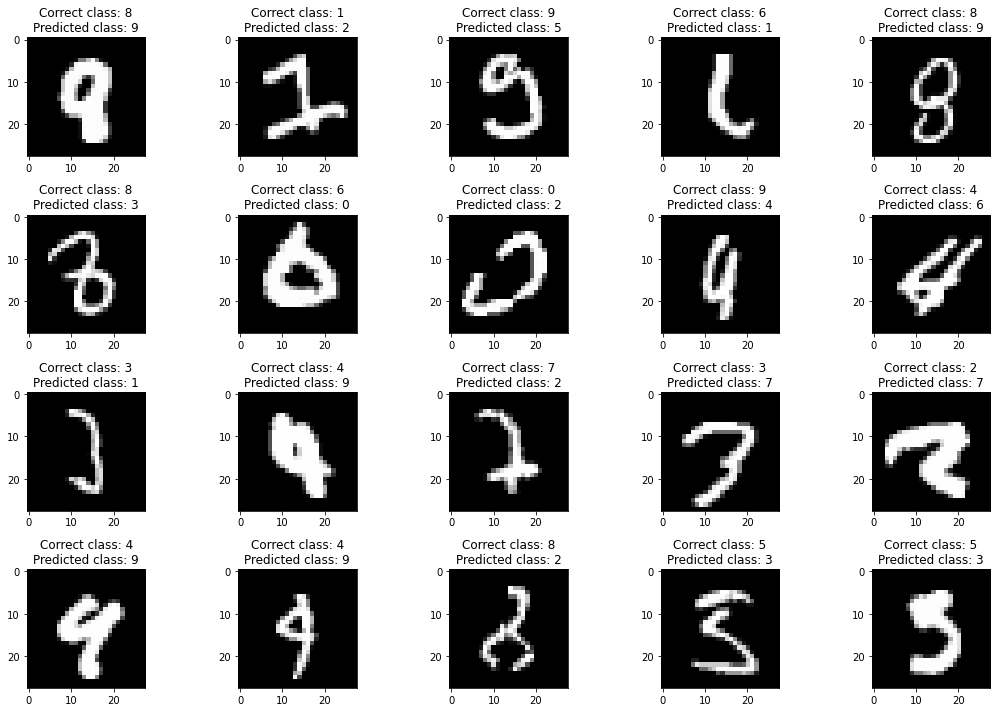

In [38]:
import matplotlib.pyplot as plt
misclassified_images_BN = plot_missclassification(model, test_loader)
print(type(misclassified_images_LN))
fig = plt.figure(figsize=(15, 10))
for i in range(20):
  sub = fig.add_subplot(4, 5, i+1)
  misclassified_image = misclassified_images_BN[i]
  plt.imshow(misclassified_image['image'].cpu().numpy().squeeze(), cmap='gray', interpolation='none')
  sub.set_title("Correct class: {}\nPredicted class: {}".format(misclassified_image['correct_class'], misclassified_image['predicted_class']))
plt.tight_layout()
plt.show()

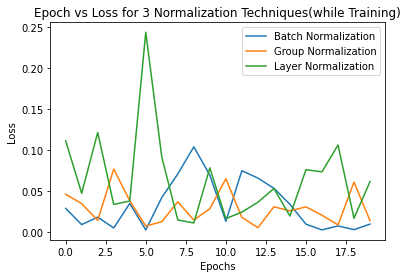

In [39]:
plt.plot(GN_train_losses, label="Batch Normalization")
plt.plot(LN_train_losses, label="Group Normalization")
plt.plot(BN_train_losses, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch vs Loss for 3 Normalization Techniques(while Training)")
plt.legend()

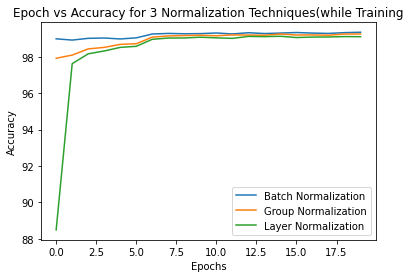

In [40]:
plt.plot(GN_train_accuracies, label="Batch Normalization")
plt.plot(LN_train_accuracies, label="Group Normalization")
plt.plot(BN_train_accuracies, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epoch vs Accuracy for 3 Normalization Techniques(while Training")
plt.legend()

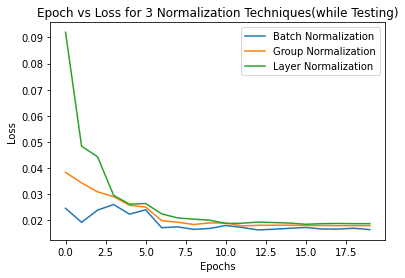

In [41]:
plt.plot(GN_test_losses, label="Batch Normalization")
plt.plot(LN_test_losses, label="Group Normalization")
plt.plot(BN_test_losses, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch vs Loss for 3 Normalization Techniques(while Testing)")
plt.legend()

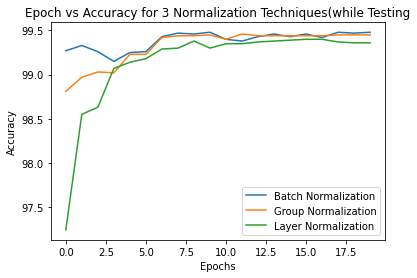

In [42]:
plt.plot(GN_test_accuracies, label="Batch Normalization")
plt.plot(LN_test_accuracies, label="Group Normalization")
plt.plot(BN_test_accuracies, label="Layer Normalization")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Epoch vs Accuracy for 3 Normalization Techniques(while Testing")
plt.legend()

In [ ]:
BN_test_acc

[99.4]